In [2]:
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

from spineq.data.fetcher import (
    extract_la_data,
    get_la_shape,
    get_oa_centroids,
    get_oa_shapes,
)
from spineq.mappings import lad20nm_to_lad20cd

%matplotlib inline

## Local Authority District to Display

In [3]:
lad20nm = "Newcastle upon Tyne"
lad20cd = lad20nm_to_lad20cd(lad20nm)

## Download Data

In [4]:
print(f"{lad20nm} ({lad20cd})")
extract_la_data(lad20cd)

Newcastle upon Tyne (E08000021)
Extracting data for E08000021...
LA shape: 1 rows
OA in this LA (mappings): 910 rows
LSOA in this LA (mappings): 175 rows


/Users/jroberts/opt/anaconda3/envs/spatial-inequality/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


OA shapes: 910 rows
Centroids: 910 rows
Total Population: 910 rows
Population by Age: 910 rows
Place of Work: 910 rows
Schools: 93 rows
NOT IMPLEMENTED: Health
Health: 175 rows
Urban Observatory Sensors: 175 rows


/Users/jroberts/opt/anaconda3/envs/spatial-inequality/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Local Authority Boundary

lad20cd                                             E08000021
lad20nm                                   Newcastle upon Tyne
geometry    POLYGON ((422592.3991 576160.0953, 422728.4014...
Name: 0, dtype: object

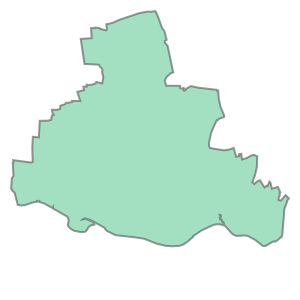

In [5]:
la = get_la_shape(lad20cd)
display(la.head())
la["geometry"]

## Output Areas Boundaries

In [5]:
oa = get_oa_shapes(lad20cd)
oa.head()

geometry
oa11cd                                                      
E00042042  POLYGON ((421176.250 564469.753, 421177.231 56...
E00042043  POLYGON ((420510.000 564944.000, 420572.364 56...
E00042044  POLYGON ((420365.325 564561.637, 420438.986 56...
E00042045  POLYGON ((421543.715 563955.116, 421503.886 56...
E00042046  POLYGON ((422200.279 563353.233, 422078.508 56...

(413669.7082000001, 430906.26379999996, 562239.7236999996, 576823.0023000002)

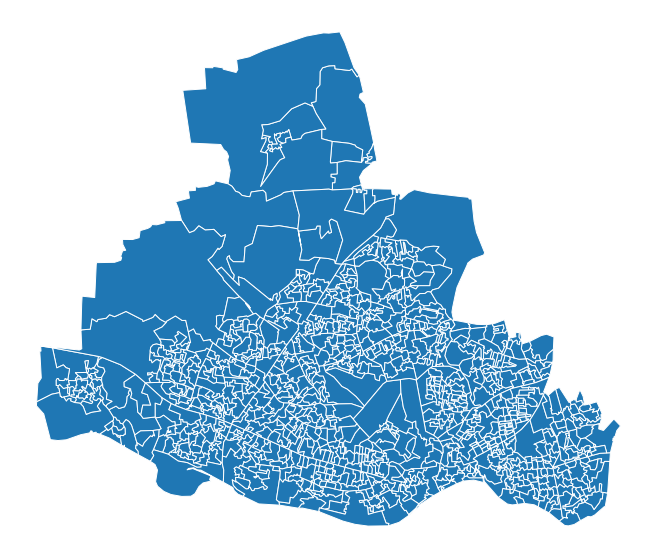

In [6]:
oa.plot(figsize=(20, 10), edgecolor="white")
plt.axis("off")

## With a base map (contextily)

https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html

Alternative map tiles:
https://wiki.openstreetmap.org/wiki/Tile_servers

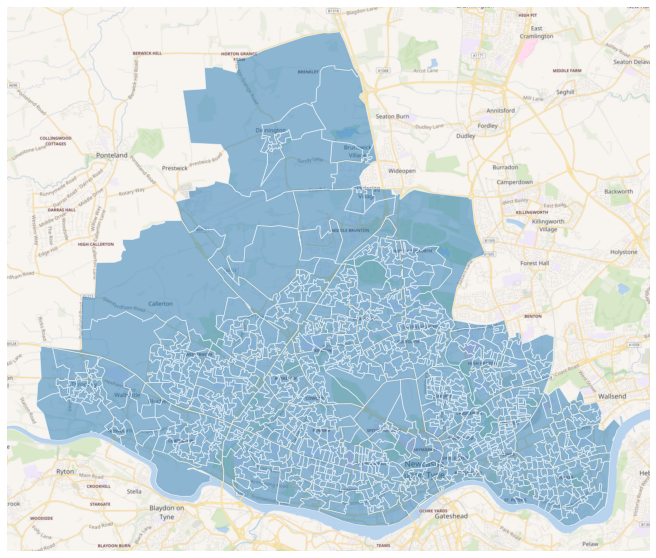

In [7]:
ax = oa.plot(figsize=(20, 10), alpha=0.5, edgecolor="white")
ctx.add_basemap(
    ax, source="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png", crs=oa.crs
)
ax.set_axis_off()

## Population Centroids

In [8]:
centroids = get_oa_centroids(lad20cd)
centroids.head()

x         y
oa11cd                       
E00042665  425731.0  564928.0
E00042671  425558.0  564791.0
E00042592  423584.0  564313.0
E00042812  423312.0  563534.0
E00042661  425561.0  564849.0

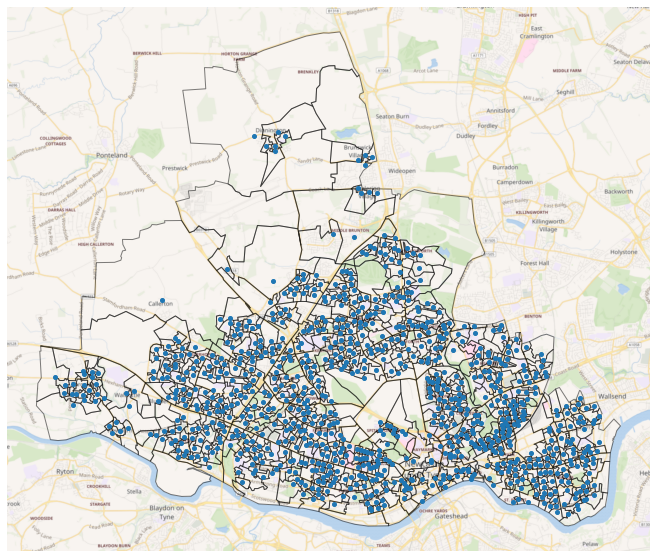

In [9]:
ax = oa.plot(figsize=(20, 10), alpha=0.5, edgecolor="black", facecolor="None")
ctx.add_basemap(
    ax, source="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png", crs=oa.crs
)
ax.set_axis_off()
plt.plot(centroids["x"], centroids["y"], linestyle="None", marker="o", markersize=4)

## Population Estimates

In [10]:
population_total = pd.read_csv(
    f"../data/processed/{lad20cd}/population_total.csv", index_col="oa11cd"
)
oa = oa.merge(population_total, left_index=True, right_index=True)

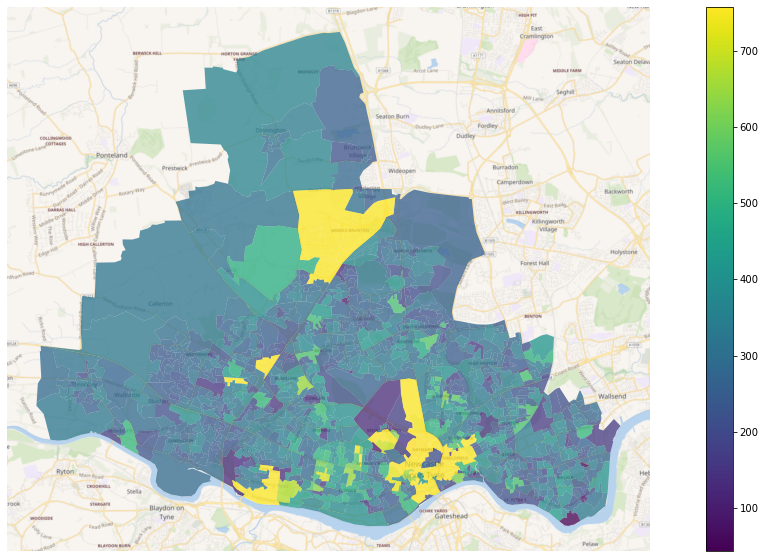

In [11]:
ax = oa.plot(
    column="population",
    figsize=(20, 10),
    alpha=0.75,
    cmap="viridis",
    legend=True,
    vmax=oa["population"].quantile(0.975),
)
ctx.add_basemap(
    ax, source="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png", crs=oa.crs
)
ax.set_axis_off()

##Â Density

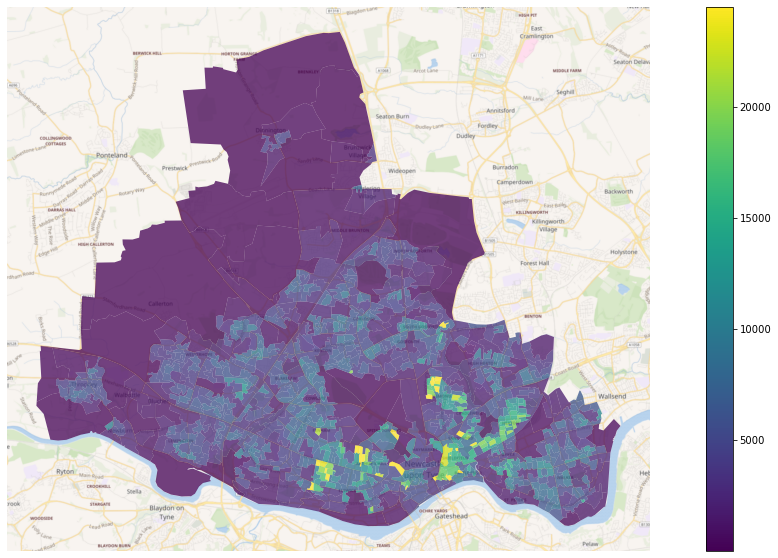

In [12]:
oa["area"] = oa["geometry"].area / 10**6
oa["density"] = oa["population"] / oa["area"]
ax = oa.plot(
    column="density",
    figsize=(20, 10),
    alpha=0.75,
    cmap="viridis",
    legend=True,
    vmax=oa["density"].quantile(0.975),
)
ctx.add_basemap(
    ax, source="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png", crs=oa.crs
)
ax.set_axis_off()